In [70]:
import pandas as pd

#read csv files
path = "/kaggle/input/ayb-ceng463-machine-learning-project-fall-2022/"
train_data = pd.read_csv(path+"train.csv")
test_data = pd.read_csv(path+"test.csv")


In [71]:
train_data.tail()

,Index,Code,Blue,Green,Red,NIR
967000,967000,0,2358,2125,1996,1893
967001,967001,0,2375,2085,1948,1897
967002,967002,0,2356,2044,1952,1877
967003,967003,0,2331,2050,1961,1884
967004,967004,0,2359,2076,1973,1902


In [72]:
ndvi = (train_data.NIR - train_data.Red)/(train_data.NIR + train_data.Red)
ndvi = pd.DataFrame(ndvi,columns=['NDVI'])

na_ndvi = []
for i in ndvi.NDVI.index:
    if pd.isnull(ndvi.NDVI.iloc[i]) :
        na_ndvi.append(i)

In [73]:
ndwi = (train_data.Green - train_data.NIR)/(train_data.Green + train_data.NIR)
ndwi = pd.DataFrame(ndwi,columns=['NDWI'])

In [74]:
train_data = pd.concat([train_data,ndvi.NDVI],axis = 1)
train_data = pd.concat([train_data,ndwi.NDWI],axis = 1)

In [75]:
train_data

,Index,Code,Blue,Green,Red,NIR,NDVI,NDWI
0,0,10,0,0,0,0,NaN,NaN
1,1,10,1997,1982,1860,3672,0.327549,-0.298903
2,2,10,1950,1906,1776,3335,0.305028,-0.272658
3,3,10,1933,1886,1742,3390,0.321122,-0.285064
4,4,10,2162,2035,2173,3605,0.247837,-0.278369
...,...,...,...,...,...,...,...,...
967000,967000,0,2358,2125,1996,1893,-0.026485,0.057740
967001,967001,0,2375,2085,1948,1897,-0.013264,0.047212
967002,967002,0,2356,2044,1952,1877,-0.019587,0.042591
967003,967003,0,2331,2050,1961,1884,-0.020026,0.042196


In [76]:
df = pd.DataFrame(train_data, index= na_ndvi)

In [79]:
train_data = train_data.drop(index = na_ndvi)

In [80]:
train_data = train_data[train_data['Code']>0]

In [81]:
train_data

,Index,Code,Blue,Green,Red,NIR,NDVI,NDWI
1,1,10,1997,1982,1860,3672,0.327549,-0.298903
2,2,10,1950,1906,1776,3335,0.305028,-0.272658
3,3,10,1933,1886,1742,3390,0.321122,-0.285064
4,4,10,2162,2035,2173,3605,0.247837,-0.278369
5,5,10,2159,2165,2112,3611,0.261926,-0.250346
...,...,...,...,...,...,...,...,...
966990,966990,80,2355,2127,1986,1917,-0.017679,0.051929
966991,966991,80,2382,2115,2001,1934,-0.017027,0.044702
966992,966992,80,2398,2146,2011,1965,-0.011569,0.044028
966993,966993,80,2346,2105,2004,1917,-0.022188,0.046743


In [82]:
! pip install -U imbalanced-learn

In [83]:
X = train_data.drop(columns=["Code","Index"])
Y = train_data["Code"]

In [84]:
X

,Blue,Green,Red,NIR,NDVI,NDWI
1,1997,1982,1860,3672,0.327549,-0.298903
2,1950,1906,1776,3335,0.305028,-0.272658
3,1933,1886,1742,3390,0.321122,-0.285064
4,2162,2035,2173,3605,0.247837,-0.278369
5,2159,2165,2112,3611,0.261926,-0.250346
...,...,...,...,...,...,...
966990,2355,2127,1986,1917,-0.017679,0.051929
966991,2382,2115,2001,1934,-0.017027,0.044702
966992,2398,2146,2011,1965,-0.011569,0.044028
966993,2346,2105,2004,1917,-0.022188,0.046743


In [85]:
Y.unique()

array([10, 50, 30, 90, 80, 60, 20, 40])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


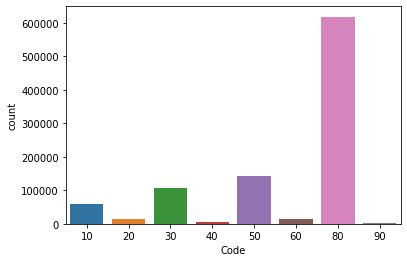

In [86]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(train_data["Code"])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


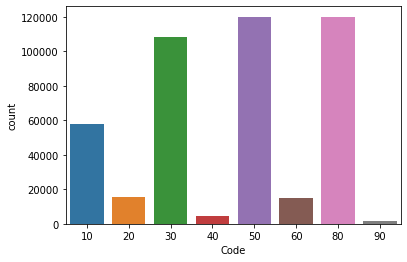

In [98]:
from imblearn.under_sampling import RandomUnderSampler

dictionary = {50:120000 , 80:120000}

rus = RandomUnderSampler(sampling_strategy=dictionary)
X_res, y_res = rus.fit_resample(X, Y)

sns.countplot(y_res)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


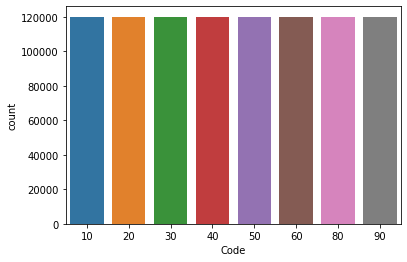

In [99]:
from imblearn.over_sampling import RandomOverSampler

dictionary = {10:120000, 20:120000, 30:120000, 40:120000, 60:120000, 90:120000}

ros = RandomOverSampler(sampling_strategy=dictionary) # String
X_resn, y_resn = ros.fit_resample(X_res, y_res)

sns.countplot(y_resn)
plt.show()

In [112]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test,y_train, y_test = train_test_split(X_resn, y_resn, test_size = 0.2, random_state = 70)

In [109]:
def train_test_score(model):
    train = 'Accuracy of Logistic regression classifier on training set '
    test = 'Accuracy of Logistic regression classifier on test set '

    print(train+ ': {:.2f}'
         .format(model.score(X_train, y_train)))
    print(test+ ': {:.2f}'
         .format(model.score(X, Y)))

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay

def conf_matrix(model):
    conf_mtrx = confusion_matrix(Y, model.predict(X))
    print('Confusion Matrix')
    print(conf_mtrx)
    print()

    print('Classification Report')
    print(classification_report(Y, model.predict(X)))

In [118]:
from matplotlib import pyplot as plt

def plot_confusion_matrix(model, classes, cmap=plt.cm.Blues):

    conf_mtrx = confusion_matrix(Y, model.predict(X))
    num_class = conf_mtrx.shape[0]
    
    fig, ax = plt.subplots()
    im = ax.imshow(conf_mtrx, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(num_class), yticks=np.arange(num_class),
           xticklabels=classes, yticklabels=classes, 
           ylabel='True label', xlabel='Predicted label')

    middle_threshold = conf_mtrx.max() / 2.
    for row in range(num_class):
        for col in range(num_class):
            ax.text(col, row, format(conf_mtrx[row, col], '.0f'), ha="center", va="center",
                    color="white" if conf_mtrx[row, col] > middle_threshold else "black")
    fig.tight_layout()
    plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

def cross_val(model):
    scores = cross_val_score(model, X, Y, cv=5)
    print(scores)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [113]:
from sklearn.linear_model import LogisticRegression as lg

logreg = lg().fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [114]:
train_test_score(logreg)

Accuracy of Logistic regression classifier on training set : 0.59
Accuracy of Logistic regression classifier on test set : 0.80


In [115]:
conf_matrix(logreg)

Confusion Matrix
[[ 27832  17528   7143   2134    362    243     78   2679]
 [  5333   8899    645    152      5      6      1    662]
 [ 17191   6124  51862  19088   4399   3013     42   6521]
 [    57      8   1010   2109    700    385      1     72]
 [   247    574   5294  17703  66157  41971   1045  10391]
 [    57     71    197   1154   4035   7947    288   1265]
 [     5     64      4     68   2166   4409 608954   3187]
 [    25    213     30     68     25    119     27   1238]]

Classification Report
              precision    recall  f1-score   support

          10       0.55      0.48      0.51     57999
          20       0.27      0.57      0.36     15703
          30       0.78      0.48      0.59    108240
          40       0.05      0.49      0.09      4342
          50       0.85      0.46      0.60    143382
          60       0.14      0.53      0.22     15014
          80       1.00      0.98      0.99    618857
          90       0.05      0.71      0.09      1745


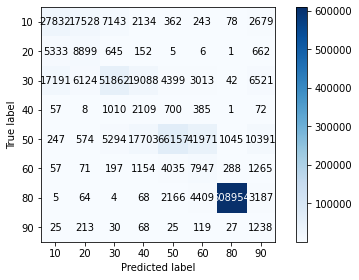

In [119]:
import numpy as np
plot_confusion_matrix(logreg, np.unique(train_data.Code), cmap=plt.cm.Blues)

In [ ]:
test_data.head()

In [ ]:
ndvi = (test_data.NIR - test_data.Red)/(test_data.NIR + test_data.Red)
ndvi = pd.DataFrame(ndvi,columns=['NDVI'])

In [ ]:
ndwi = (test_data.Green - test_data.NIR)/(test_data.Green + test_data.NIR)
ndwi = pd.DataFrame(ndwi,columns=['NDWI'])

In [ ]:
test_data = pd.concat([test_data,ndvi.NDVI],axis = 1)
test_data = pd.concat([test_data,ndwi.NDWI],axis = 1)

In [ ]:
test_data

In [ ]:
test_data = test_data.fillna(0)

In [ ]:
test = test_data.drop(columns = "Id")

In [ ]:
test

In [ ]:
pred = logreg.predict(test)

In [ ]:
pred = pd.DataFrame(pred,columns=['Code'])

In [ ]:
sub = pd.concat([test_data.Id,pred],axis=1)

In [ ]:
sub.set_index('Id',inplace=True)

In [ ]:
sub.to_csv(f"Submission2.csv")

In [ ]:
pred.tail()